Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years;
Administration -- spend on administration in the past few years;
Marketing Spend -- spend on Marketing in the past few years;
State -- states from which data is collected;
Profit  -- profit of each state in the past few years.
#Step1: Import Files

In [5]:
from google.colab import files
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [6]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
pd.set_option("display.max_rows",None)
df.rename(columns={'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Marketing'},inplace=True)
df

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#Step-2: EDA

<Axes: >

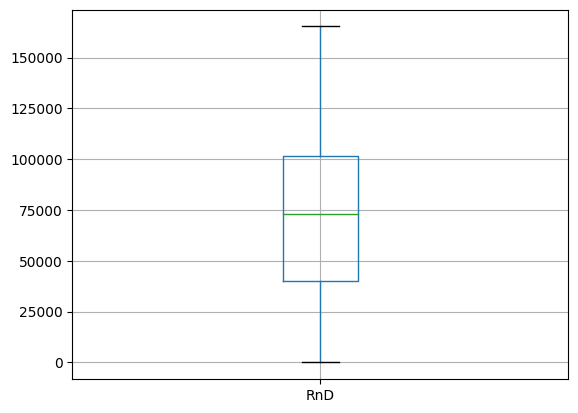

In [7]:
df.boxplot(column='RnD')

<Axes: >

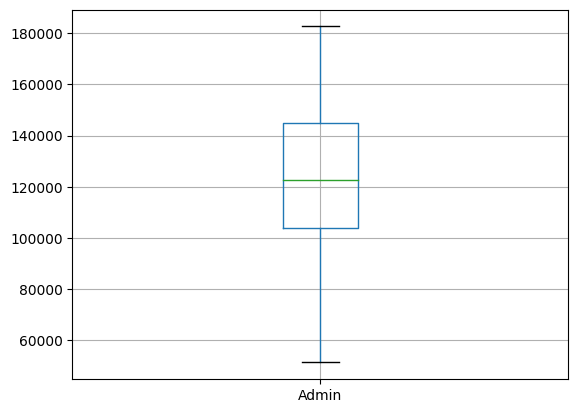

In [8]:
df.boxplot(column='Admin')

<Axes: >

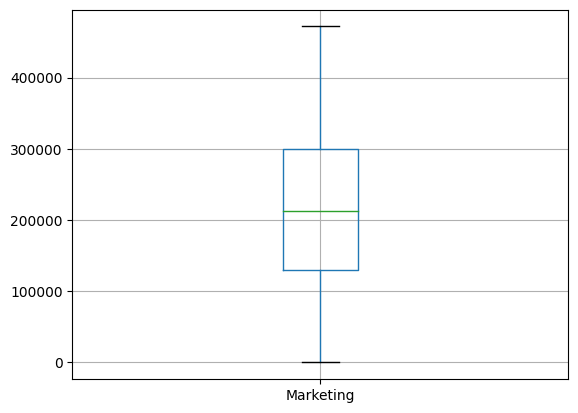

In [9]:
df.boxplot(column='Marketing')

From the Box plot, there are no "Outliers"

0.164002172321177

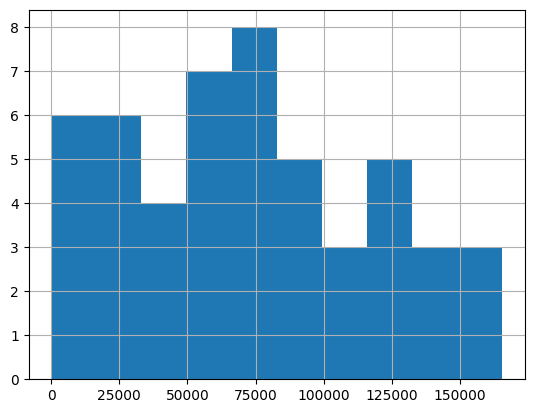

In [10]:
df['RnD'].hist()
df['RnD'].skew()

-0.4890248099671768

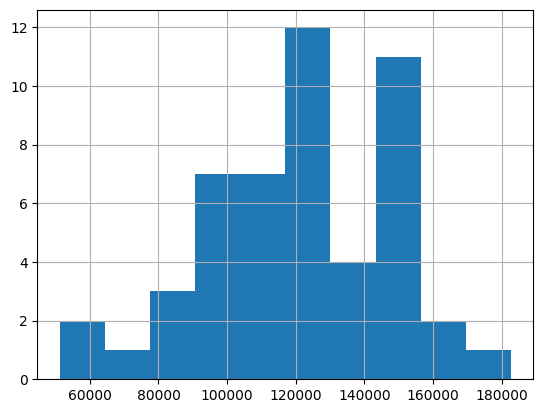

In [11]:
df['Admin'].hist()
df['Admin'].skew()

-0.04647226758360412

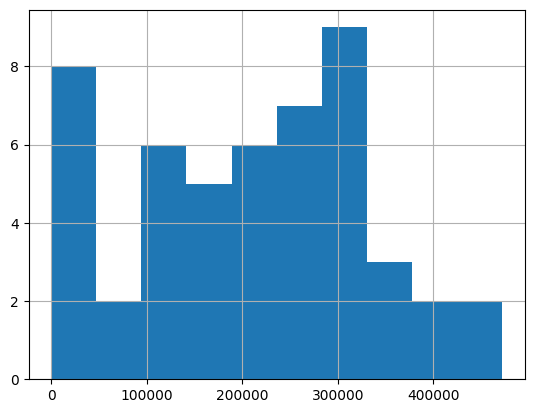

In [12]:
df['Marketing'].hist()
df['Marketing'].skew()

RnD, Admin columns are positively and negatively skewed. Skewness of Marketing column is close to zero. We can take it symmetrical.

In [13]:
n1=df['RnD'].isnull().sum()
n2=df['Admin'].isnull().sum()
n3=df['Marketing'].isnull().sum()
n4=df['State'].isnull().sum()
print(n1,n2,n3,n4)

0 0 0 0


No null values

In [14]:
df[['RnD','Admin','Marketing']].corr()

,RnD,Admin,Marketing
RnD,1.000000,0.241955,0.724248
Admin,0.241955,1.000000,-0.032154
Marketing,0.724248,-0.032154,1.000000


RnD & Admin are weakly positive,
RnD % Marketing are strongly postive,
Marketing & Admin can be treated as No relationship.

In [15]:
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df['RnD'])
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value > alpha:
    print("RnD column is normally distributed (fail to reject H0)")
else:
    print("RnD column isnt normally distributed (reject H0)")

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df['Admin'])
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value > alpha:
    print("Admin column is normally distributed (fail to reject H0)")
else:
    print("Admin column is not normally distributed (reject H0)")

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df['Marketing'])
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value > alpha:
    print("Marketing column is normally distributed (fail to reject H0)")
else:
    print("Marketing column is not normally distributed (reject H0)")

RnD column is normally distributed (fail to reject H0)
Admin column is normally distributed (fail to reject H0)
Marketing column is normally distributed (fail to reject H0)


All the three columns follow Normal Distribution

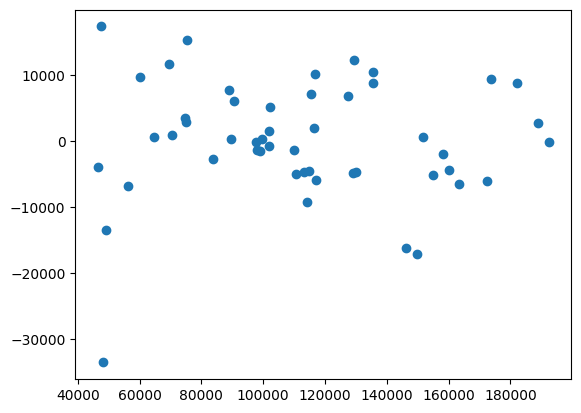

Intercept: 50125.34383167077
Coefficients:
State[T.Florida]     198.788793
State[T.New York]    -41.887019
RnD                    0.806023
Admin                 -0.027004
Marketing              0.026980
dtype: float64


In [16]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RnD+Admin+Marketing+State',data=df).fit()
model.resid
model.fittedvalues

import matplotlib.pyplot as plt
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.show()
correlation = model.fittedvalues.corr(model.resid)
correlation #No correlation => Independence of residuals and Homoscedasiticity

# Get the intercept and coefficients
intercept = model.params['Intercept']
coefficients = model.params.drop('Intercept')

# Print the results
print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Residuals are not normally distributed (reject H0)


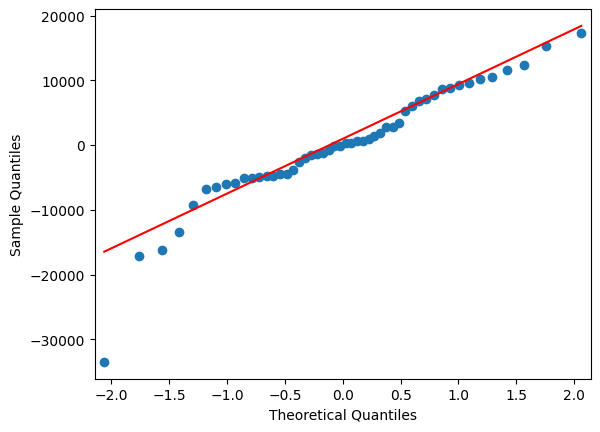

In [17]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')

from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(model.resid)
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value > alpha:
    print("Residuals are normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")

Residuals are not normally distributed

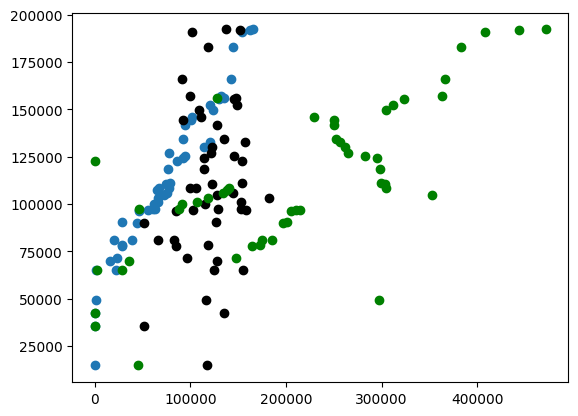

<ipython-input-18-78762395d929>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [18]:
x1=df[['RnD']]
x2=df[['Admin']]
x3=df[['Marketing']]
Y=df[['Profit']]
#3 scatter plots ---->X1 X2 X3 vs Y
import matplotlib.pyplot as plt
plt.scatter(x=x1,y=Y)
plt.scatter(x=x2,y=Y,color='black')
plt.scatter(x=x3,y=Y,color='green')
plt.show()
df.corr()
df[['RnD','Admin','Marketing','Profit']].corr()

RnD, Marketing are strongly positively related to Profit, and Admin is weakly positively related to profit.

#Step-3: Data Transformation



In [19]:
df.columns[3]

'State'

In [20]:
df.columns

Index(['RnD', 'Admin', 'Marketing', 'State', 'Profit'], dtype='object')

In [21]:
df[df.columns[3]]

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object

In [22]:
X1=df.iloc[:,0:3]
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X1)
print(type(SS_X))
X1 = pd.DataFrame(SS_X)
X1.columns = ['RnD','Admin','Marketing']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
X2=LE.fit_transform(df[df.columns[3]])
print(type(X2))
X2=pd.DataFrame(X2)
X2.columns=['State']
X = pd.concat([X1, X2],axis=1)
Y=df['Profit']
Y.columns=['Profit']

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#Step-4: Data Splitting

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=1471)
X_train.shape, X_test.shape

((37, 4), (13, 4))

#Step-5: Model Fitting

In [24]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
LR.intercept_, LR.coef_

(111055.71788857416,
 array([36603.36764494, -1064.82779211,  2863.03464069,  1483.95141956]))

#Step-6: Metrics

In [25]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#TRAINING AND TESTING ERRORS
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)
error1= np.sqrt(mean_squared_error(Y_train,Y_pred_train))
print("Training Error:", error1.round(3))
error2= np.sqrt(mean_squared_error(Y_test,Y_pred_test))
print("Test Error:", error2.round(3))

#MODEL ERROR
Y_pred = LR.predict(X)
mse=mean_squared_error(Y,Y_pred)
print('Error on entire Data: ', np.sqrt(mse))

#R2
r2=r2_score(Y,Y_pred)
print('R2 value for Model-1: ', r2)

Training Error: 8945.224
Test Error: 9033.968
Error on entire Data:  8968.38222486035
R2 value for Model-1:  0.949480521889958


Model-1:
1. Intercept = 111055.718
2. Coefficients = 36603.368, -1064.828,  2863.035,  1483.951
---------------------------------------------------------------
1.  RMSE:        8968.38222486035
2.  R2 value:    0.949480521889958






In [26]:
df[['RnD','Admin','Marketing','Profit']].corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [27]:
X.head()

,RnD,Admin,Marketing,State
0,2.016411,0.560753,2.153943,2
1,1.955860,1.082807,1.923600,0
2,1.754364,-0.728257,1.626528,1
3,1.554784,-0.096365,1.422210,2
4,1.504937,-1.079919,1.281528,1


In [28]:
#Model-1
#splitting
X1=X
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

8968.38222486035 0.949480521889958


In [29]:
#Model-2
#splitting
X1=X[['RnD', 'Admin', 'State']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

9244.100807730849 0.9463264917816437


In [30]:
#Model-3
#splitting
X1=X[[ 'Admin', 'Marketing', 'State']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

25481.2652876818 0.5921761542792059


In [31]:
#Model-4
#splitting
X1=X[[ 'RnD', 'Marketing', 'State']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

8951.638849887031 0.9496689788392422


In [32]:
#Model-5
#splitting
X1=X[[ 'RnD', 'Marketing', 'Admin']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

8865.507745024895 0.950632871799572


In [33]:
#Model-6
#splitting
X1=X[[ 'RnD', 'Admin']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

9138.453819724837 0.9475463058055421


In [34]:
#Model-7
#splitting
X1=X[[ 'Admin', 'Marketing']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

25522.86147069538 0.5908435861144643


In [35]:
#Model-8
#splitting
X1=X[[ 'RnD', 'State']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

9305.555407532309 0.945610478798985


In [36]:
#Model-9
#splitting
X1=X[[ 'Marketing', 'State']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

26757.912982016744 0.5502873427251675


In [37]:
#Model-10
#splitting
X1=X[[ 'RnD', 'Marketing']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

8885.51964957775 0.9504097497174434


In [38]:
#Model-11
#splitting
X1=X[[ 'Admin', 'State']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

40912.08256591044 -0.05131730052692962


The Model-5(RnD, Marketing, and Admin) with RMSE = 8865.51 and R2 = 0.9506 seems to be the best model among .
However, we can also consider Models 1 (all variables),4 (RnD, Marketing, and State), and 10 (RnD, Marketing) for their closeness to Model-5.

Overall model-1 seems to be the best among the all other models

#Improving by Data cleaning

In [39]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
pd.set_option("display.max_rows",None)
df.rename(columns={'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Marketing'},inplace=True)
df.head()

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
X1=df.iloc[:,0:3]
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X1)
X1 = pd.DataFrame(SS_X)
X1.columns = ['RnD','Admin','Marketing']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
X2=LE.fit_transform(df[df.columns[3]])
X2=pd.DataFrame(X2)
X2.columns=['State']
X = pd.concat([X1, X2],axis=1)
Y=df['Profit']
Y.columns=['Profit']

In [41]:
print(X.head(),Y.head())

        RnD     Admin  Marketing  State
0  2.016411  0.560753   2.153943      2
1  1.955860  1.082807   1.923600      0
2  1.754364 -0.728257   1.626528      1
3  1.554784 -0.096365   1.422210      2
4  1.504937 -1.079919   1.281528      1 0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [42]:
df.head()

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
import statsmodels.api as sm

model = sm.OLS(Y, X)  # Capitalize OLS
model = model.fit()

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1=X.copy()
X1['constant']=1 #Including a constant in VIF accounts for the intercept in regression, providing a more comprehensive assessment.
# Calculate VIF for all variables in X
X1=X1[['RnD', 'Marketing', 'Admin', 'constant']]
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print("VIF for Model-1:")
print(vif)


VIF for Model-1:
[2.4689030699947017, 2.3267732905308773, 1.1750910070550453, 0.9999999999999998]


No multi-collinearity issues

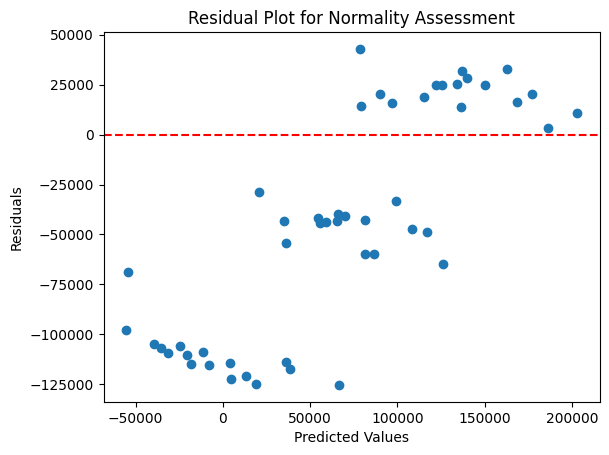

In [45]:
import matplotlib.pyplot as plt

# 1. Calculate the residuals
residuals = model.predict(X) - Y

# 2. Create a residual plot
plt.scatter(model.predict(X), residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Normality Assessment")
plt.axhline(y=0, color='r', linestyle='--')

# 3. Check normality visually - look for randomness around y=0

# 4. Display the plot
plt.show()


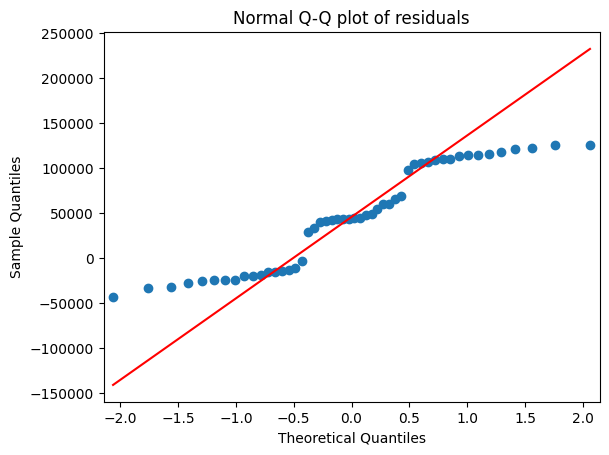

[array([ 1,  2,  4,  6,  7,  9, 10, 11, 12, 13, 14, 16, 18, 20, 22, 23, 25,
        26, 28, 30, 32, 33, 34, 36, 37, 39, 40, 41, 42, 44, 46, 47, 49])]

In [46]:
# residual analysis by using Q-Q plot

import matplotlib.pyplot as plt

QQ_plot = sm.qqplot(model.resid,line="q") # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

list(np.where(model.resid>10))



from the scatterplot, residuals are not nomral, as there is no enough randomness in the scatter of points around the horizontal line at y=0. Even the Q-Q plot seems doubtful. Lets check by Shapiro-wilk test.

In [47]:
from scipy import stats

# Assuming 'residuals' is the variable containing your residuals
stat, p = stats.shapiro(residuals)

# stat is the test statistic, and p is the p-value

# Check the p-value
alpha = 0.05  # Set your significance level
if p > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")


The data does not appear to be normally distributed (reject H0)


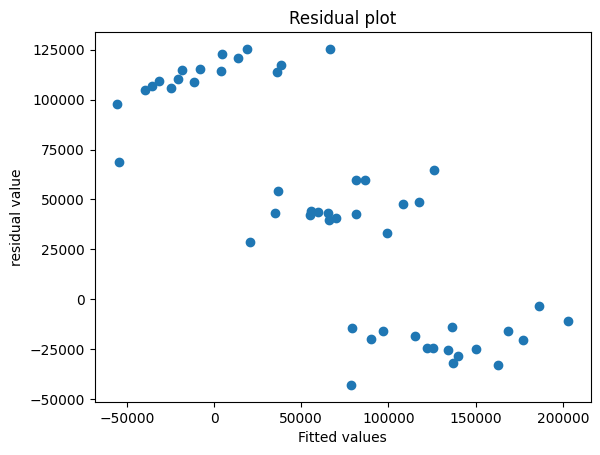

In [48]:
# Residual plot for homoscedasticity

model.fittedvalues
model.resid

plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual plot")
plt.xlabel("Fitted values")
plt.ylabel("residual value")
plt.show()

In [49]:
import statsmodels.api as sm

# Calculate Cook's distance for each observation
influence = model.get_influence()
cooks_distance = influence.cooks_distance
print(cooks_distance)
# Access Cook's distance values
cooks_values = cooks_distance[0]

# Determine a threshold for Cook's distance to identify influential points
threshold = 4 / len(X)  # You can adjust this threshold as needed

# Find the indices of influential points
influential_indices = []

for i in range(len(cooks_distance)):
    if cooks_distance[i] > threshold:
        influential_indices.append(i)

print("Influential point indices:", influential_indices)


(array([1.01472048e-03, 9.12301730e-02, 2.30026924e-02, 6.04924920e-05,
       1.31215213e-02, 2.28413579e-03, 1.31106673e-01, 5.45343461e-03,
       1.09721306e-03, 2.27854002e-02, 5.56229647e-03, 3.44397084e-02,
       2.54561415e-03, 5.20739909e-03, 2.98262355e-03, 3.55540500e-03,
       4.45562621e-03, 2.24610027e-03, 1.88260354e-03, 2.85450646e-03,
       1.20344989e-02, 5.28970043e-03, 3.17052486e-03, 4.16025266e-03,
       3.26861560e-03, 9.67221846e-03, 2.83658192e-03, 7.27881802e-03,
       1.37368593e-02, 2.95078094e-03, 4.51201844e-03, 3.17699083e-03,
       3.77294801e-02, 2.02817620e-03, 5.50273765e-02, 1.61112074e-03,
       9.53300235e-03, 9.30459536e-02, 2.24583206e-03, 2.32051524e-02,
       1.64112927e-02, 5.57613007e-03, 1.87003965e-02, 2.23573471e-03,
       4.57099960e-02, 1.42222052e-03, 1.50097601e-02, 3.86906933e-02,
       3.70468175e-02, 1.31379429e-02]), array([0.99999785, 0.98475901, 0.99893185, 0.99999999, 0.99964744,
       0.99998915, 0.97024416, 0.999938

ValueError: ignored